<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Fernanda Amador, Frida Hernandez

**Fecha:** 12 de Octubre 2021.

**Expediente** : 725573, 720476.
 
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/feramdor/Tarea5_Amador_Hernandez
# Tarea 5: Clase 9

## Instrucciones

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

>### <font color ='red'> **Tarea 4** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


#### Código de solución `Estudiante 1: Frida Hernández`

#### Inciso 1
* Inversa de la función igual a $U$
$$U=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$
$$\frac{U\pi}{2}=\sin^{-1}(\sqrt x)$$
$$\sin^{-1}\frac{U\pi}{2}=(\sqrt x)$$
$$(\sin^{-1}\frac{U\pi}{2})^2=x$$

In [23]:
# función
N = 1000
def D_continua(N):
    return (np.sin((np.random.random(N)*np.pi)/2))**2
x = D_continua(N)

$$F(x) = \frac{2}{\pi}\sin^{-1}(\sqrt{x})$$


$$F(x) =  \frac{2}{\pi}\sin^{-1}(a)$$



$$a = \sqrt{x} $$

* Derivada de $a$

$$\frac{d}{dx} = \frac{1}{2\sqrt{x}}$$

* Derivada de arcoseno:

$$\frac{d}{dx} = \frac{1}{\sqrt{1-x^2}}$$

* Volver a derivar la principal
$$\frac{dF(x)}{dx} = \frac{2}{\pi} \frac{1}{\sqrt{1-a^2}} a'$$

* Evaluar el valor de $a$ y $a'$:
$$\frac{dF(x)}{dx} = \frac{2}{\pi \sqrt{1-\sqrt{x}^2}} \frac{1}{2\sqrt{x}}$$ 

* Simplicar:
$$\frac{dF(x)}{dx} = \frac{1}{\pi\sqrt{(1-x)x}}$$

$$\frac{dF(x)}{dx} = \frac{1}{\pi\sqrt{-(x-1)x}}$$

<ipython-input-24-31673e31d6b5>:1: RuntimeWarning: divide by zero encountered in true_divide
  derivada = lambda x: 1/(np.pi * np.sqrt(-(x-1)*x))


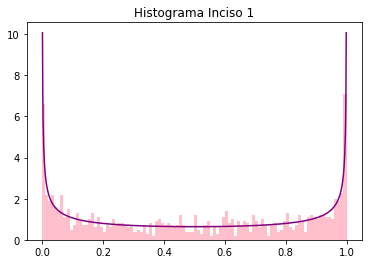

In [24]:
derivada = lambda x: 1/(np.pi * np.sqrt(-(x-1)*x))
x1 = np.arange(0,1,0.001)

plt.plot(x1,derivada(x1),'-r',color='purple')
plt.hist(x,100,density=True,color='pink')
plt.title('Histograma Inciso 1')
plt.show()

#### Inciso 2

In [25]:
#Probabilidad acumulada
n=10
p=0.7
def bin_acum(n,p):
    v = np.zeros(n)
    v[0] = (1-p)**n
    def llenado(i):
        nonlocal v
        v[i+1]=(((n-i)/(i+1))*(p/(1-p)))*v[i]
    [llenado(i) for i in range(n-1)]
    return np.cumsum(v)
p_acum = bin_acum(n,p)
p_acum

array([5.90490000e-06, 1.43685900e-04, 1.59038640e-03, 1.05920784e-02,
       4.73489874e-02, 1.50268333e-01, 3.50389282e-01, 6.17217214e-01,
       8.50691654e-01, 9.71752475e-01])

In [35]:
#Funciones en clase
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    U =np.random.rand(N)
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

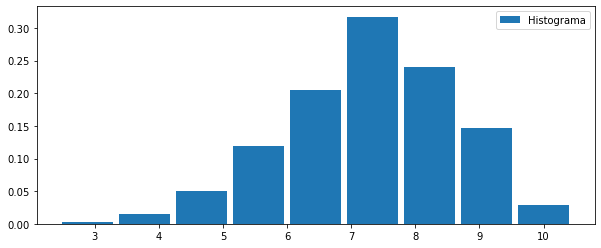

In [36]:
t_binom = Gen_distr_discreta(p_acum,np.arange(0, n+1),N)
plot_histogram_discrete(t_binom,'Histograma')